In [21]:
#импорт библиотек
import numpy as np
import pandas as pd
import statistics as st

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

In [2]:
#загрузка данных
data_raw = pd.read_csv('C:/Users/Egor/Downloads/forwarders_data.csv',encoding='unicode_escape',decimal=',',sep=';')
data_raw.head()

,Manufacturer,Model,Mass,Length,Width,Height,Ground clearance,Steering angle,Wheel width,Wheel diameter,Engine output,Tractive force,Velocity,Tank volume,Pump volume,Load capacity
0,Ponsse,Wisent,16300,9080,2690.0,3810,645,44.0,707.424,1340,145,165.0,20,150,130,12000
1,Ponsse,Mammoth,28500,11090,3168.0,4000,770,42.5,776.355,1525,210,320.0,20,265,90,25000
2,Ponsse,Elk,17700,9380,2690.0,3860,670,44.0,707.424,1340,145,175.0,20,150,130,13000
3,Ponsse,Elephant King,22900,10150,3070.0,3990,800,44.0,707.424,1340,210,240.0,20,260,170,20000
4,Ponsse,Elephant,22000,10150,2990.0,3990,800,44.0,707.424,1340,205,220.0,20,260,170,18000


0.95375


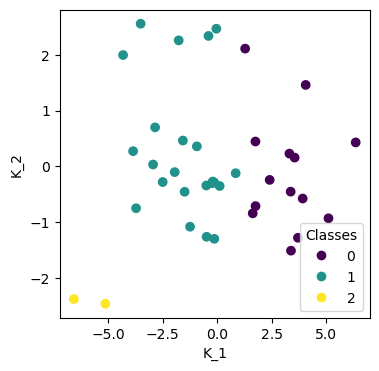

In [20]:
data = data_raw
data = data.drop(['Manufacturer','Model'], axis = 1)
X = data.values
X_clf = X
labels = data.columns.values.tolist()

#размерность пространства главных компонент и число кластеров
d = 4
k_num = 3

#подготовка данных
scale = StandardScaler(with_mean = False, with_std = True)
X = scale.fit_transform(X)

#отображение исходного признакового пространства в пространство главных компонент
pca = PCA(n_components = d)
K = pca.fit_transform(X)

#кластеризация данных
clustering_results = KMeans(n_clusters = k_num, n_init = 'auto').fit(K)
y = clustering_results.labels_

#обучение модели логистической регрессии (классификатор)
score_lst = []

clf = LogisticRegression(fit_intercept = True, max_iter = 10000, solver='saga')

#число циклов оценки коэффициентов регрессии
cls_iters = 10

for i in range (cls_iters):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)
    clf.fit(X_train, y_train)
    score_lst.append(clf.score(X_test, y_test))

r_2_mean = st.mean(score_lst)

print(r_2_mean)

plt.figure(figsize=(4,4))
scatter = plt.scatter(K[:,0],K[:,1], c = y)
plt.xlabel('K_1')
plt.ylabel('K_2')
plt.legend(*scatter.legend_elements(), title="Classes")

plt.show()